## Importing Necessary Library

In [1]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from IPython.core.display import HTML
from colorama import Fore, Back, Style
%matplotlib inline
import warnings
# if there are any warning due to version mismatch, it will be ignored
warnings.filterwarnings('ignore')

# Importing Data Source

In [3]:
# import dataset 
loan_data = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\loan\\loan.csv",low_memory= False)

In [4]:
# quickly testing if your object has the right type of data in it
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
# Checking Size of dataset
loan_data.shape

(39717, 111)

## Missing Value Check

In [6]:
na_sum = loan_data[:].isnull().sum()
print(na_sum)


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


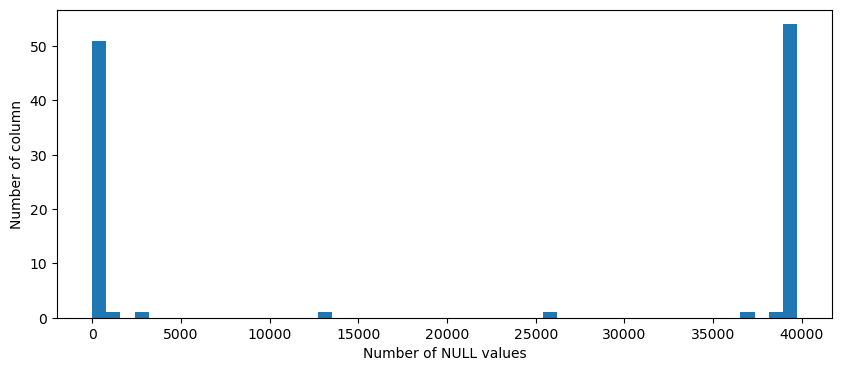

In [7]:
# Identifiying columns have missing values and unique values, let see explore more to keep or drop them
count = loan_data.isnull().sum()
count.plot(kind='hist', bins=50, figsize = (10,4))
plt.xlabel("Number of NULL values")
plt.ylabel("Number of column")
plt.show()

In [8]:
# In the above figure, it is clearly seen that there is a huge spike towards the 40K mark. The total records in our data is 39,717. 
# These columns would not be obviously needed that have all NULLs. 
count.loc[(count.values == 39717)].sort_values()

mths_since_last_major_derog       39717
mort_acc                          39717
mths_since_recent_bc              39717
mths_since_recent_bc_dlq          39717
mths_since_recent_inq             39717
mths_since_recent_revol_delinq    39717
num_accts_ever_120_pd             39717
num_actv_bc_tl                    39717
num_actv_rev_tl                   39717
num_bc_sats                       39717
num_bc_tl                         39717
num_il_tl                         39717
num_op_rev_tl                     39717
num_rev_accts                     39717
num_rev_tl_bal_gt_0               39717
num_sats                          39717
num_tl_120dpd_2m                  39717
num_tl_30dpd                      39717
num_tl_90g_dpd_24m                39717
num_tl_op_past_12m                39717
pct_tl_nvr_dlq                    39717
percent_bc_gt_75                  39717
tot_hi_cred_lim                   39717
total_bal_ex_mort                 39717
mo_sin_rcnt_tl                    39717


## Deleting Columns having all NULL values

In [9]:
# Columns having all NULL values are not useful for any anlaysis. Dropping columns having NULL values for all rows.  
loan_data.dropna(axis = 1, how = 'all', inplace=True)

In [10]:
#Checking dataset size
loan_data.shape

(39717, 57)

In [11]:
# Idenfiying columns where missing data is more than 25%. 
count = loan_data.isnull().sum()
count.loc[(count.values > 10000)].sort_values()

desc                      12942
mths_since_last_delinq    25682
mths_since_last_record    36931
next_pymnt_d              38577
dtype: int64

In [12]:
# Analysis of 'desc' column
loan_data['desc'].head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

In [13]:
# Loan description provided by the borrower is random text. It may not help to define any pattern further. Also, not than 25 % are null. So, dropping
# 'desc' column.
loan_data.drop('desc', axis=1,inplace=True)

In [14]:
# driving percentage of null of 'next_pymnt_d'.
100*loan_data['next_pymnt_d'].isnull().sum()/loan_data.shape[0]

97.1296925749679

In [15]:
# This is one of the important columns. However, this column has 97% null values. So, this will not have define any pattern. Droping 'next_pymnt_d'
loan_data.drop('next_pymnt_d', axis=1,inplace=True)

In [16]:
# driving percentage of null of 'mths_since_last_record'.
100*loan_data['mths_since_last_record'].isnull().sum()/loan_data.shape[0]

92.98537150338646

In [17]:
# checking the group vales 
loan_data.groupby('mths_since_last_record').size()

mths_since_last_record
0.0      670
5.0        1
6.0        1
7.0        1
11.0       2
        ... 
117.0     47
118.0     36
119.0     10
120.0      1
129.0      1
Length: 111, dtype: int64

In [18]:
# This column has the number of months since the last public record. However, this column has 93% null values or zero value. So, this will not have define any pattern. Droping 'mths_since_last_record'
loan_data.drop('mths_since_last_record', axis=1,inplace=True)

In [19]:
# Checking size of dataset
loan_data.shape

(39717, 54)

In [20]:
# driving percentage of null of 'mths_since_last_record'.
100*loan_data['mths_since_last_delinq'].isnull().sum()/loan_data.shape[0]

64.66248709620565

In [21]:
# This column has number of months since the borrower's last delinquency. However, this column has 65% null values or zero value. So, this will not have define any pattern. Droping 'mths_since_last_delinq'
loan_data.drop('mths_since_last_delinq', axis=1,inplace=True )

In [22]:
loan_data.shape

(39717, 53)

In [23]:
#  Dropped those columns with missing data so far. Checking max values of null values.
row = loan_data.isnull().sum(axis=1) / len(loan_data.columns)
max(row.values)

0.09433962264150944

In [24]:
#there are any columns with unique or single values in them.
column_unique = loan_data.nunique()
print(column_unique)

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [25]:
# Check columns with single value
Col1 = column_unique[column_unique.values == 1]
Col1.index

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [26]:
# Check columns with single value and drop them as they will be no use for our analysis.
# drop above columns with values "1"
loan_data.drop(columns = list(Col1.index), inplace=True)
loan_data.shape

(39717, 44)

There are 44 columns post fixing Missing Values.This analyisis to know which loan applications are risky. Fields like id, member_id & url are different for each application. zip_code could have been a useful driver, but it contains only partial data which might impute our analysis negatively. 
Therefore, let us drop all these columns mentioned below

In [27]:
del_cols = ["id","member_id","url","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv",
            "total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee",
            "last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"]
loan_data.drop(columns=del_cols, inplace=True)
loan_data.shape

(39717, 28)

In [28]:
# Checking to fix missing data
loan_data.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [29]:
# Fix Job Title as 'Unknown' for data which are not provided
print(loan_data.emp_title.unique())
loan_data.emp_title.fillna('Unknown', inplace=True)

[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'FiSite Research'
 'Squarewave Solutions, Ltd.' 'Evergreen Center']


In [30]:
# Fix Home Ownership with NONE as 
loan_data.home_ownership.replace(to_replace = ['NONE'],value='OTHER',inplace = True)
loan_data.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [61]:
# Dumping the each column datatypes
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             39717 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

In [31]:
# Checking possibility of converting the object type to a valid datatypes
columns =  loan_data.columns
for col in columns:
    dtype = type(loan_data[col].dtypes)
    if "ObjectDType"  in str(dtype):
        print(f"##### Column - {col} Type - {dtype}")
        print(loan_data[col].head(1)[0])

##### Column - term Type - <class 'numpy.dtypes.ObjectDType'>
 36 months
##### Column - int_rate Type - <class 'numpy.dtypes.ObjectDType'>
10.65%
##### Column - grade Type - <class 'numpy.dtypes.ObjectDType'>
B
##### Column - sub_grade Type - <class 'numpy.dtypes.ObjectDType'>
B2
##### Column - emp_title Type - <class 'numpy.dtypes.ObjectDType'>
Unknown
##### Column - emp_length Type - <class 'numpy.dtypes.ObjectDType'>
10+ years
##### Column - home_ownership Type - <class 'numpy.dtypes.ObjectDType'>
RENT
##### Column - verification_status Type - <class 'numpy.dtypes.ObjectDType'>
Verified
##### Column - issue_d Type - <class 'numpy.dtypes.ObjectDType'>
Dec-11
##### Column - loan_status Type - <class 'numpy.dtypes.ObjectDType'>
Fully Paid
##### Column - purpose Type - <class 'numpy.dtypes.ObjectDType'>
credit_card
##### Column - title Type - <class 'numpy.dtypes.ObjectDType'>
Computer
##### Column - addr_state Type - <class 'numpy.dtypes.ObjectDType'>
AZ
##### Column - earliest_cr_line

#### Based on analysing the object type columns, below are convertible to useful format

#### Columns in %:
    * int_rate
    * revol_util
#### Columns in (month-year):
    * issue_d
    * earliest_cr_line
    * initial_list_status

In [32]:
# Convert All percentage in object type to float type
loan_data['int_rate_p'] = loan_data['int_rate'].apply(lambda y: y.split('%')[0]).astype(float)
# Filling the revol_util NaN with Median
rev_median = loan_data['revol_util'].str.replace('%', '').median()
loan_data['revol_util'] = loan_data['revol_util'].fillna(f'{rev_median}%')
# Convert All percentage in object type to float type
loan_data['revol_util_p'] = loan_data['revol_util'].apply(lambda y: y.split('%')[0]).astype(float)

In [33]:
# Convert All Month-Year object type to Date Time format
loan_data['issue_d'] = loan_data['issue_d'].str.replace('-','-19')
loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].str.replace('-','-19')

loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%Y')
loan_data['earliest_cr_line'] = pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%Y')

In [34]:
# Subgrade refers to Grade + Sub division value from grade, Updating the value with Sub division of it
loan_data['sub_grade'] = loan_data['sub_grade'].apply(lambda y: y[1]).astype(int)

In [35]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39717 non-null  int64         
 1   funded_amnt           39717 non-null  int64         
 2   funded_amnt_inv       39717 non-null  float64       
 3   term                  39717 non-null  object        
 4   int_rate              39717 non-null  object        
 5   installment           39717 non-null  float64       
 6   grade                 39717 non-null  object        
 7   sub_grade             39717 non-null  int32         
 8   emp_title             39717 non-null  object        
 9   emp_length            38642 non-null  object        
 10  home_ownership        39717 non-null  object        
 11  annual_inc            39717 non-null  float64       
 12  verification_status   39717 non-null  object        
 13  issue_d         

## Data preparation

In [36]:
loan_data['loan_status'].value_counts()


loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [37]:
#Let's remvoe %
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))
loan_data['int_rate'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [38]:
loan_data['issue_d'].head()

0   1911-12-01
1   1911-12-01
2   1911-12-01
3   1911-12-01
4   1911-12-01
Name: issue_d, dtype: datetime64[ns]

In [39]:
#let us convert these values in numberics by removing %
loan_data['revol_util'] = pd.Series(loan_data['revol_util']).str.replace('%', '').astype(float)
loan_data['revol_util'].describe()

count    39717.000000
mean        48.832741
std         28.314798
min          0.000000
25%         25.500000
50%         49.300000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

In [40]:
loan_data['term'].value_counts()

term
 36 months    29096
 60 months    10621
Name: count, dtype: int64

In [41]:
print(loan_data['emp_title'].value_counts().head())
print(loan_data['emp_title'].unique().shape)

emp_title
Unknown            2459
US Army             134
Bank of America     109
IBM                  66
AT&T                 59
Name: count, dtype: int64
(28821,)


In [42]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [43]:
loan_data['emp_length'].isnull().sum()

1075

In [44]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies',
       'int_rate_p', 'revol_util_p'],
      dtype='object')

In [45]:
len(loan_data['title'].value_counts())

19615

In [46]:
loan_data['title'].head(10)

0                                 Computer
1                                     bike
2                     real estate business
3                                 personel
4                                 Personal
5    My wedding loan I promise to pay back
6                                     Loan
7                          Car Downpayment
8     Expand Business & Buy Debt Portfolio
9              Building my credit history.
Name: title, dtype: object

In [47]:
loan_data['title'].sample(10)

15859           dental loan
21520                 Deans
38644    Debt Consolidation
4676     Debt Consolidation
23680         Christmas2010
18861      moving/furniture
35894       Loan Acceptance
27270      Basement upgrade
7833          Personal Loan
34177     Home Down Payment
Name: title, dtype: object

In [48]:
# 'title' column has too many unique values. Droping this column as it may not be useful to keep it
loan_data.drop(columns=['title'], inplace=True)

In [49]:
loan_data['addr_state'].value_counts()

addr_state
CA    7099
NY    3812
FL    2866
TX    2727
NJ    1850
IL    1525
PA    1517
VA    1407
GA    1398
MA    1340
OH    1223
MD    1049
AZ     879
WA     840
CO     792
NC     788
CT     751
MI     720
MO     686
MN     615
NV     497
SC     472
WI     460
AL     452
OR     451
LA     436
KY     325
OK     299
KS     271
UT     258
AR     245
DC     214
RI     198
NM     189
WV     177
HI     174
NH     171
DE     114
MT      85
WY      83
AK      80
SD      64
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: count, dtype: int64

In [50]:
loan_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,int_rate_p,revol_util_p
count,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717,39717.000000,39717.000000,39717,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000,39717.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,12.021177,324.561922,3.051917,6.896893e+04,1910-11-03 23:26:45.166553600,13.315130,0.146512,1959-09-01 05:34:25.805574464,0.869200,9.294408,0.055065,13382.528086,48.832741,22.088828,0.043260,12.021177,48.832741
min,500.000000,500.000000,0.000000,5.420000,15.690000,1.000000,4.000000e+03,1907-06-01 00:00:00,0.000000,0.000000,1900-01-01 00:00:00,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,5.420000,0.000000
25%,5500.000000,5400.000000,5000.000000,9.250000,167.020000,2.000000,4.040400e+04,1910-05-01 00:00:00,8.170000,0.000000,1904-04-01 00:00:00,0.000000,6.000000,0.000000,3703.000000,25.500000,13.000000,0.000000,9.250000,25.500000
50%,10000.000000,9600.000000,8975.000000,11.860000,280.220000,3.000000,5.900000e+04,1911-02-01 00:00:00,13.400000,0.000000,1989-06-01 00:00:00,1.000000,9.000000,0.000000,8850.000000,49.300000,20.000000,0.000000,11.860000,49.300000
75%,15000.000000,15000.000000,14400.000000,14.590000,430.780000,4.000000,8.230000e+04,1911-08-01 00:00:00,18.600000,0.000000,1996-04-01 00:00:00,1.000000,12.000000,0.000000,17058.000000,72.300000,29.000000,0.000000,14.590000,72.300000
max,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,5.000000,6.000000e+06,1911-12-01 00:00:00,29.990000,11.000000,1999-12-01 00:00:00,8.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,2.000000,24.590000,99.900000
std,7456.670694,7187.238670,7128.450439,3.724825,208.874874,1.395114,6.379377e+04,NaN,6.678594,0.491812,NaN,1.070219,4.400282,0.237200,15885.016641,28.314798,11.401709,0.204324,3.724825,28.314798


In [51]:
# changing the loan_status to a numeric variable, assign 1 for defaulted loans and 0 for paid off ones
loan_data['loan_status_code'] = loan_data['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,int_rate_p,revol_util_p,loan_status_code
0,5000,5000,4975.0,36 months,10.65,162.87,B,2,Unknown,10+ years,...,1,3,0,13648,83.7,9,0.0,10.65,83.7,0
1,2500,2500,2500.0,60 months,15.27,59.83,C,4,Ryder,< 1 year,...,5,3,0,1687,9.4,4,0.0,15.27,9.4,1
2,2400,2400,2400.0,36 months,15.96,84.33,C,5,Unknown,10+ years,...,2,2,0,2956,98.5,10,0.0,15.96,98.5,0
3,10000,10000,10000.0,36 months,13.49,339.31,C,1,AIR RESOURCES BOARD,10+ years,...,1,10,0,5598,21.0,37,0.0,13.49,21.0,0
4,3000,3000,3000.0,60 months,12.69,67.79,B,5,University Medical Group,1 year,...,0,15,0,27783,53.9,38,0.0,12.69,53.9,0


In [52]:
# Analysing different columns to check the driving factor for Defaulted which is - 'Charged Off' in loan_status
print(f'Unique values in loan_status: {loan_data["loan_status"].unique()}')

Unique values in loan_status: ['Fully Paid' 'Charged Off' 'Current']


In [53]:
def column_info(loan_data=loan_data):
    print("-------------------------------------------------------")
    print("%-25s %-20s %-5s" % ('Column', 'Dtype', 'Unique Count'))
    print("-------------------------------------------------------")
    i = 1
    for each in loan_data.columns:
        print("%d %-23s %-20s %-5s" % (i, each, loan_data[each].dtype, loan_data[each].nunique()))
        i = i + 1

column_info()

-------------------------------------------------------
Column                    Dtype                Unique Count
-------------------------------------------------------
1 loan_amnt               int64                885  
2 funded_amnt             int64                1041 
3 funded_amnt_inv         float64              8205 
4 term                    object               2    
5 int_rate                float64              371  
6 installment             float64              15383
7 grade                   object               7    
8 sub_grade               int32                5    
9 emp_title               object               28821
10 emp_length              object               11   
11 home_ownership          object               4    
12 annual_inc              float64              5318 
13 verification_status     object               3    
14 issue_d                 datetime64[ns]       55   
15 loan_status             object               3    
16 purpose                 

In [54]:
# Seperating it for Univarient Analysing
categorical_columns = ['term', 'emp_length', 'home_ownership',
                       'verification_status', 'purpose', 'inq_last_6mths',
                       'pub_rec', 'pub_rec_bankruptcies', 'grade','addr_state' ]
numerical_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc',
                     'dti', 'open_acc', 'total_acc', 'total_rec_late_fee', 'recoveries',
                     'collection_recovery_fee', 'int_rate_p', 'revol_util_p','loan_status_code']
date_time_columns = [ 'issue_d' , 'earliest_cr_line' ]

In [55]:
# Declaring loan_status and order variable
by = 'loan_status'
order = ['Fully Paid','Charged Off','Current']

In [56]:
def PercentileCut (*, data=loan_data, column, trailer=''):
    """
        Parameters:
            data : defaulted to 'loan_data'
            column : Continuous numeric field which has to be binned to its percentiles
            trailer : defaulted to blank, this will be added to the end of the percentile values.like '%' for interest rate related fields
        Returns:
            None
            It creates a new column in the data with a suffix '_p' and this contains the newly created category
    """
    new_column = column + '_p'
    labels = ['Lowest ','Lower ','Medium ','Higher ','Highest ']
    labels = [labels[p] + '(' +
              str(round(np.nanpercentile(data[column], p * 20),2)) +
              trailer + ' - ' +
              str(round(np.nanpercentile(data[column], (p+1) * 20),2)) +
              trailer + ')'
              for p in range(5)]
    data[new_column] = pd.qcut(data[column], q=5, labels=labels)

In [57]:
def Univariate_Categorical (*, data=loan_data, column, title=None, figsize=(8,6), grp_comparison=True, box_plot=False,
                            pct_comparison=False, filter=None, disp_filter = None):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            column : need to provide the numerical column for comparison
            figsize : a default have is given, but can be overridden
            loan_status_pct : a global variable, which is referred here for the percentage comparison
            grp_comparison : with this as true, it groups the data based on the categories and compares
            pct_comparison : this will call the Pct_Comparison method and below couple parameters will be applicable for it
            filter : any conditions based on which the data will be filtered before plotting, ignored if None
            disp_filter : string for display purpose only, valid if filter is not None
        Returns:
            None, does a countplot and a box plot as well, if needed
    """
    plotdata = data if filter is None else data.loc[filter]
        
    if pct_comparison and filter is not None:
        Pct_Comparison(filter, disp_filter)

    if grp_comparison:
        fig, ax = plt.subplots(figsize=figsize)
        sns.countplot(data=plotdata, y=column, hue=by, ax=ax, 
                      order=plotdata[column].value_counts().index, hue_order=order, palette="RdYlGn_r" )
        if title is not None:
            plt.title(title)
        plt.show()
        
        df = loan_data.groupby([column])[by].value_counts(normalize=True
                                                    ).rename('Charged off %').reset_index().sort_values(column)
        df = df.loc[df[by]=='Charged Off'].sort_values(by='Charged off %', ascending=False).drop(columns=[by])
        df2 = loan_data.groupby([column])[by].count()
        df = df.merge(right=df2,on=column).rename(columns={by:'Record count'})
        display(HTML(df.to_html(index=False)))
        
        if box_plot:
            df2.plot(kind='box',logy=True,x="No. of records of defaulted loans per category")
            plt.show()        

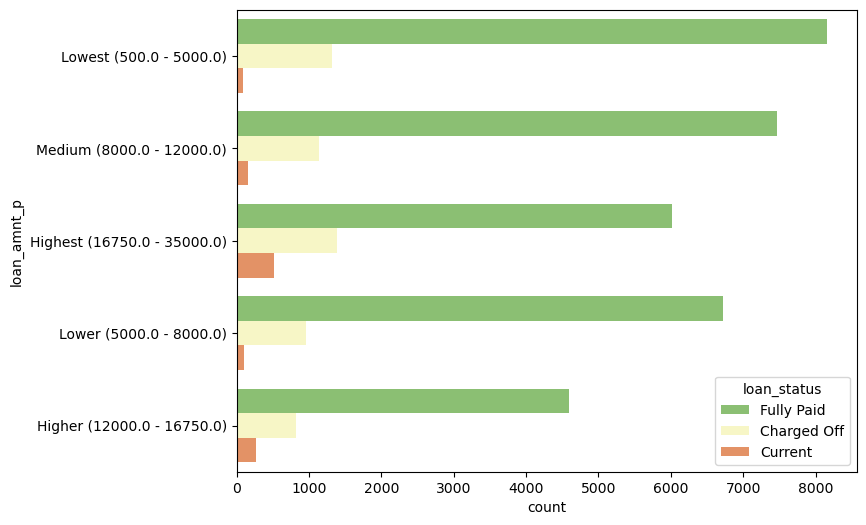

loan_amnt_p,Charged off %,Record count
Highest (16750.0 - 35000.0),0.175706,7928
Higher (12000.0 - 16750.0),0.144495,5668
Lowest (500.0 - 5000.0),0.137333,9568
Medium (8000.0 - 12000.0),0.129621,8764
Lower (5000.0 - 8000.0),0.123893,7789


In [58]:
PercentileCut(column='loan_amnt')
Univariate_Categorical(column='loan_amnt_p')

Higher the loan amount, greater the chance of the loan getting default.

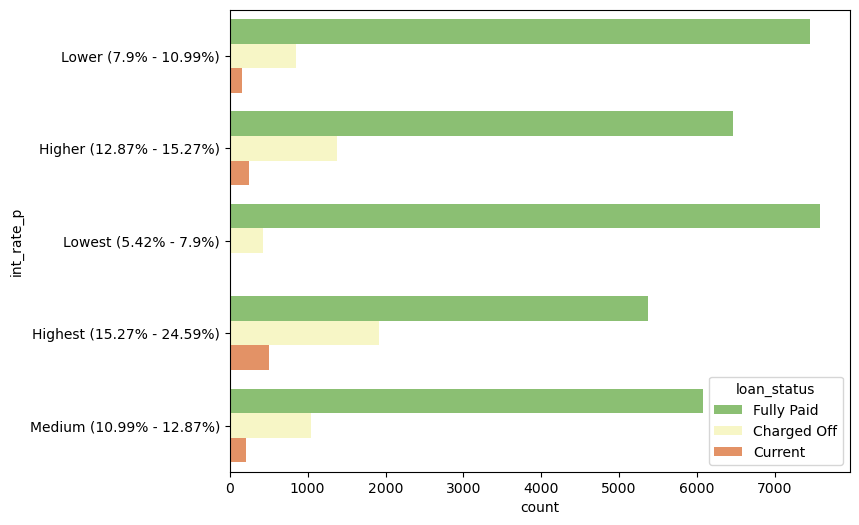

int_rate_p,Charged off %,Record count
Highest (15.27% - 24.59%),0.246085,7790
Higher (12.87% - 15.27%),0.170765,8093
Medium (10.99% - 12.87%),0.142351,7334
Lower (7.9% - 10.99%),0.100921,8472
Lowest (5.42% - 7.9%),0.053438,8028


In [59]:
PercentileCut(column='int_rate', trailer='%')
Univariate_Categorical(column='int_rate_p')

Higher the interest rate leads to higher charged off%

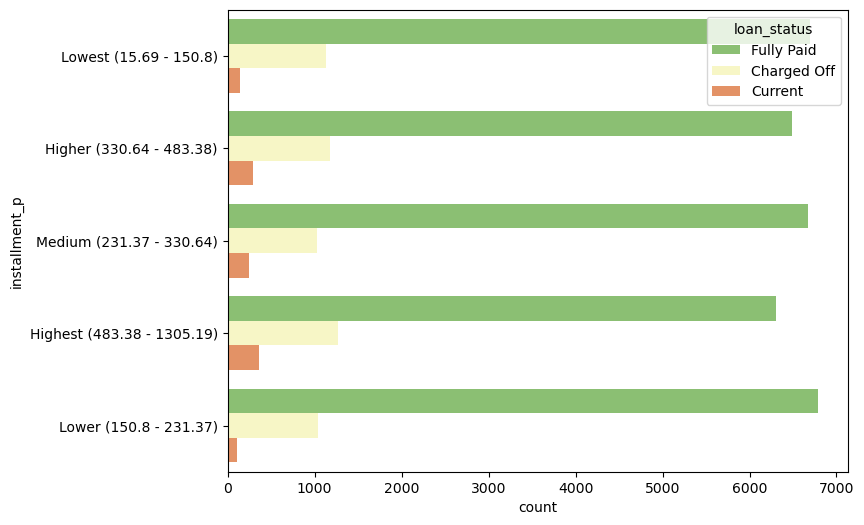

installment_p,Charged off %,Record count
Highest (483.38 - 1305.19),0.159254,7937
Higher (330.64 - 483.38),0.147547,7950
Lowest (15.69 - 150.8),0.141888,7957
Lower (150.8 - 231.37),0.130374,7931
Medium (231.37 - 330.64),0.129313,7942


In [60]:
PercentileCut(column='installment')
Univariate_Categorical(column='installment_p')

Higher installment amounts shows higher default percentages.

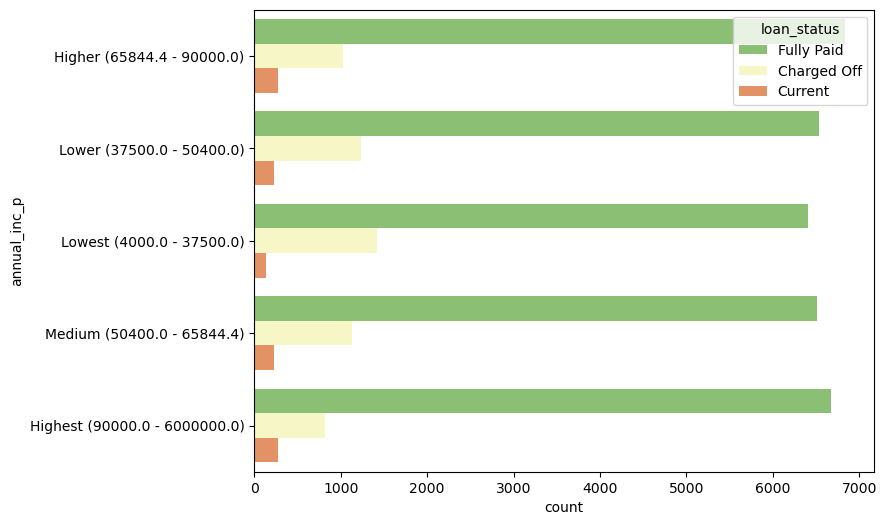

annual_inc_p,Charged off %,Record count
Lowest (4000.0 - 37500.0),0.178692,7969
Lower (37500.0 - 50400.0),0.153875,7987
Medium (50400.0 - 65844.4),0.144145,7874
Higher (65844.4 - 90000.0),0.125553,8132
Highest (90000.0 - 6000000.0),0.105480,7755


In [61]:
PercentileCut(column='annual_inc')
Univariate_Categorical(column='annual_inc_p')

Higher the income higher the repayment %

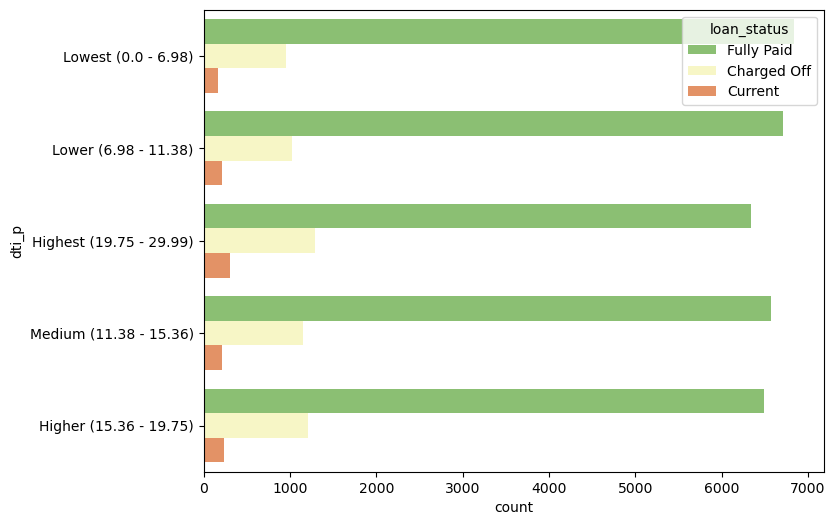

dti_p,Charged off %,Record count
Highest (19.75 - 29.99),0.162679,7942
Higher (15.36 - 19.75),0.152508,7934
Medium (11.38 - 15.36),0.144818,7941
Lower (6.98 - 11.38),0.128492,7946
Lowest (0.0 - 6.98),0.119940,7954


In [189]:
PercentileCut(column='dti')
Univariate_Categorical(column='dti_p')

higher DTI ( debt to income ratio) will lead to higher charged off %

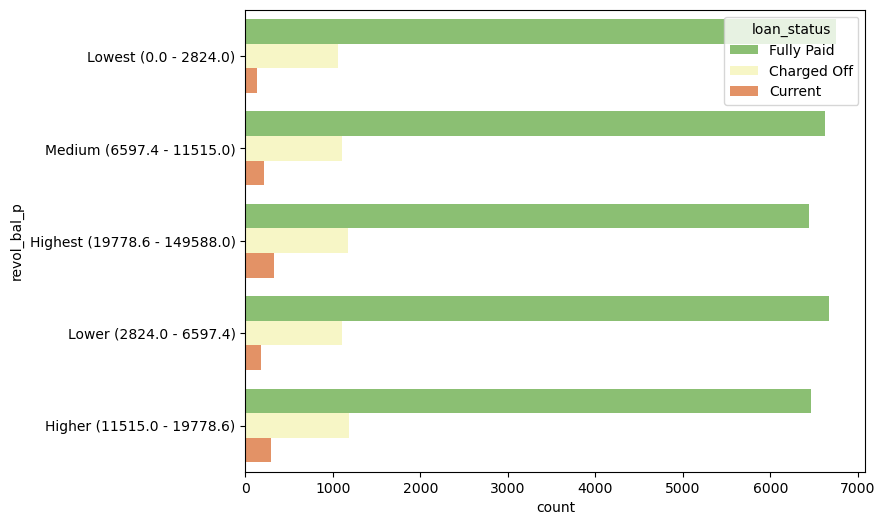

revol_bal_p,Charged off %,Record count
Higher (11515.0 - 19778.6),0.149584,7942
Highest (19778.6 - 149588.0),0.147784,7944
Medium (6597.4 - 11515.0),0.139099,7944
Lower (2824.0 - 6597.4),0.138630,7942
Lowest (0.0 - 2824.0),0.133291,7945


In [62]:
PercentileCut(column='revol_bal')
Univariate_Categorical(column='revol_bal_p')

This shows the total credit revolving balances slightly influence the default percentage. 
Higher the revolving balance, bigger the chance of the loan getting defaulted.

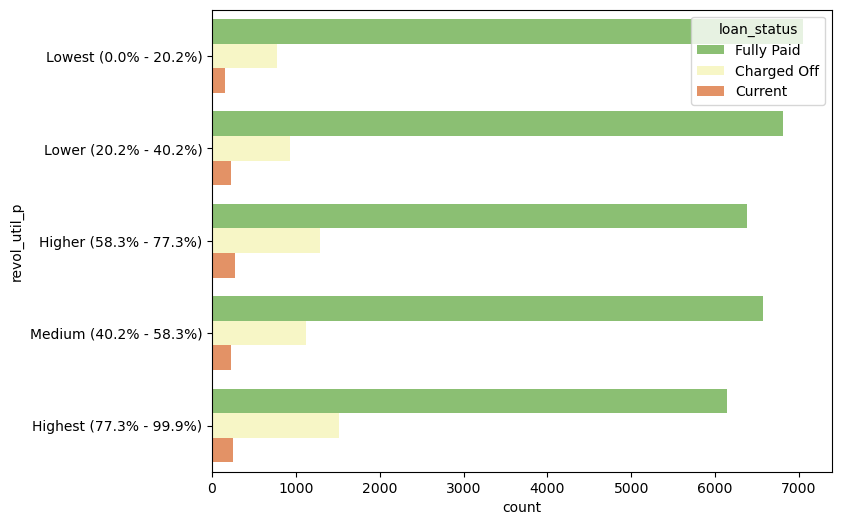

revol_util_p,Charged off %,Record count
Highest (77.3% - 99.9%),0.191739,7917
Higher (58.3% - 77.3%),0.162155,7943
Medium (40.2% - 58.3%),0.141524,7928
Lower (20.2% - 40.2%),0.116153,7955
Lowest (0.0% - 20.2%),0.097191,7974


In [63]:
PercentileCut(column='revol_util',trailer='%')
Univariate_Categorical(column='revol_util_p')

This data shows that the revolving line utilization rate has a large impact to the default percentage. 
When this increases, the charged off percentage rises.

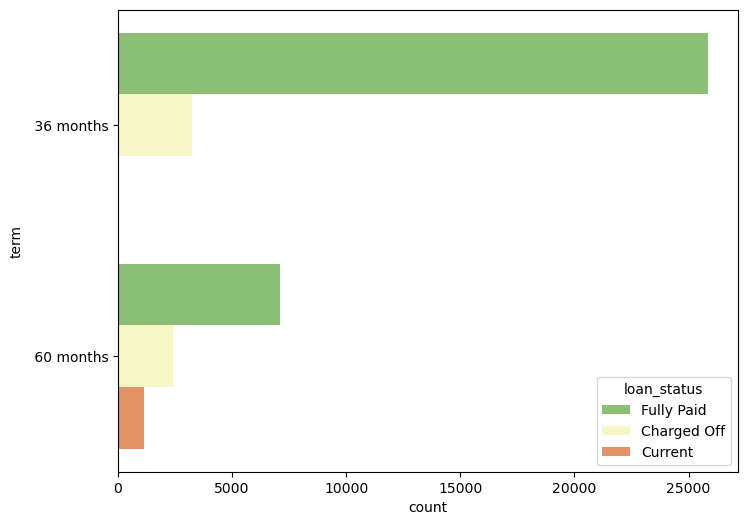

term,Charged off %,Record count
60 months,0.225967,10621
36 months,0.110909,29096


In [64]:
Univariate_Categorical(column='term')

For loans with 5 year repayment term, the default percent is 25%. And for 3 year loan repayment term, the default is only for 11% of the cases.
Therefore, loan repayment term plays a factor in judging the default rate.

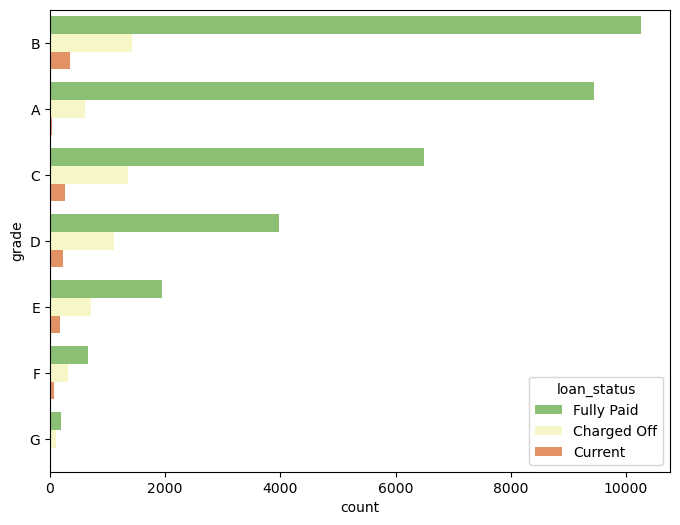

grade,Charged off %,Record count
G,0.319620,316
F,0.304099,1049
E,0.251583,2842
D,0.210665,5307
C,0.166337,8098
B,0.118552,12020
A,0.059693,10085


In [65]:
Univariate_Categorical(column='grade')

Loan grades having highest default percentages. G, F, E and D form grades where default rate is much higher than others.

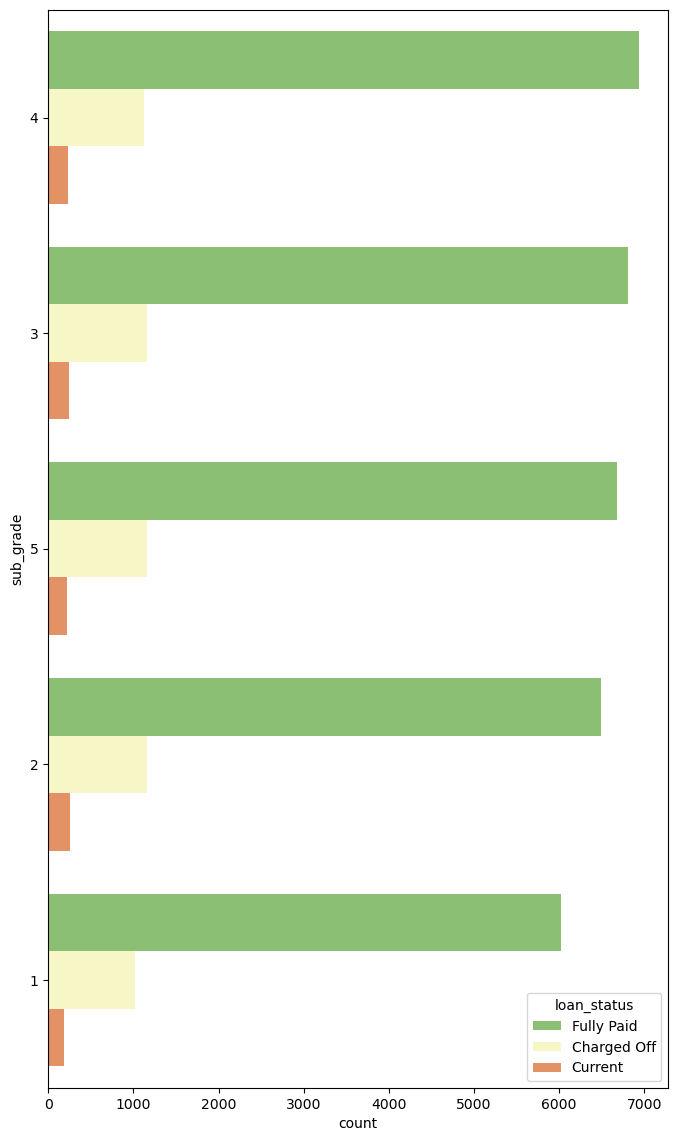

sub_grade,Charged off %,Record count
2,0.146073,7907
5,0.144114,8070
1,0.141593,7232
3,0.141083,8215
4,0.135777,8293


In [66]:
Univariate_Categorical(column='sub_grade', figsize=(8,14))

The loan sub-grade versus the default percentage. The G3 and F5 sub categories have above 40% default rate.
This field is a clear indicator of the default percent.

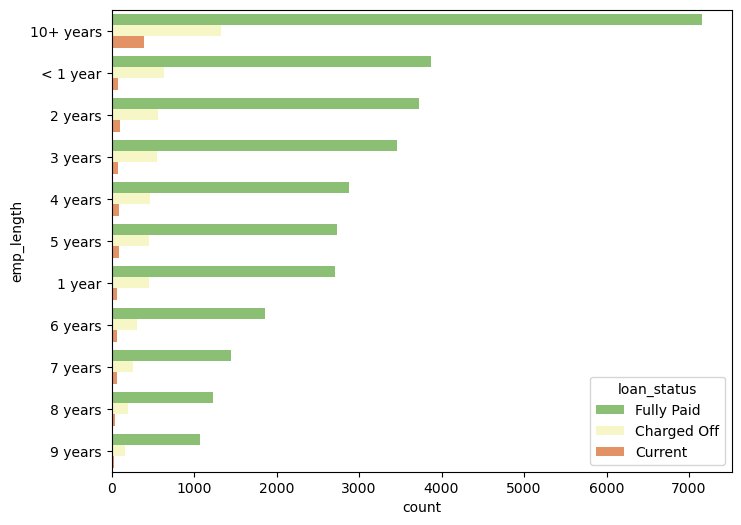

emp_length,Charged off %,Record count
10+ years,0.149904,8879
7 years,0.148336,1773
1 year,0.140741,3240
5 years,0.139549,3282
< 1 year,0.139428,4583
6 years,0.137730,2229
8 years,0.137255,1479
3 years,0.135531,4095
4 years,0.134459,3436
2 years,0.129216,4388


In [67]:
Univariate_Categorical(column='emp_length')

Although there is nothing much to conclude from above data, we can see having no employment will lead to Defaulted payment

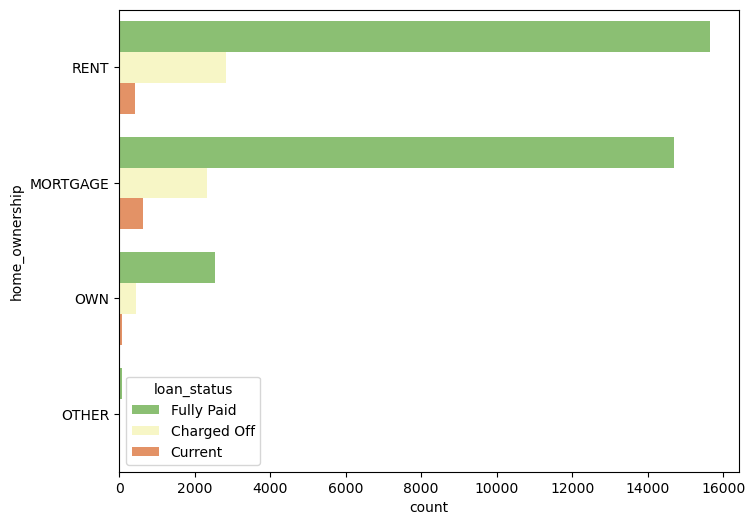

home_ownership,Charged off %,Record count
OTHER,0.178218,101
RENT,0.150220,18899
OWN,0.144866,3058
MORTGAGE,0.131774,17659


In [69]:
Univariate_Categorical(column='home_ownership')

not much info to conclude as it says "OTHER",

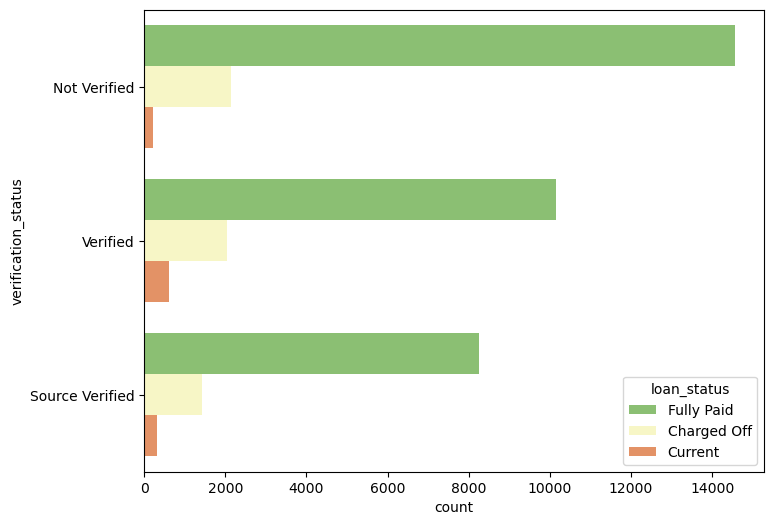

verification_status,Charged off %,Record count
Verified,0.160122,12809
Source Verified,0.143587,9987
Not Verified,0.126588,16921


In [70]:
Univariate_Categorical(column='verification_status')

Verified applicants have more defaulted % which means the verifiaction process is not correct.

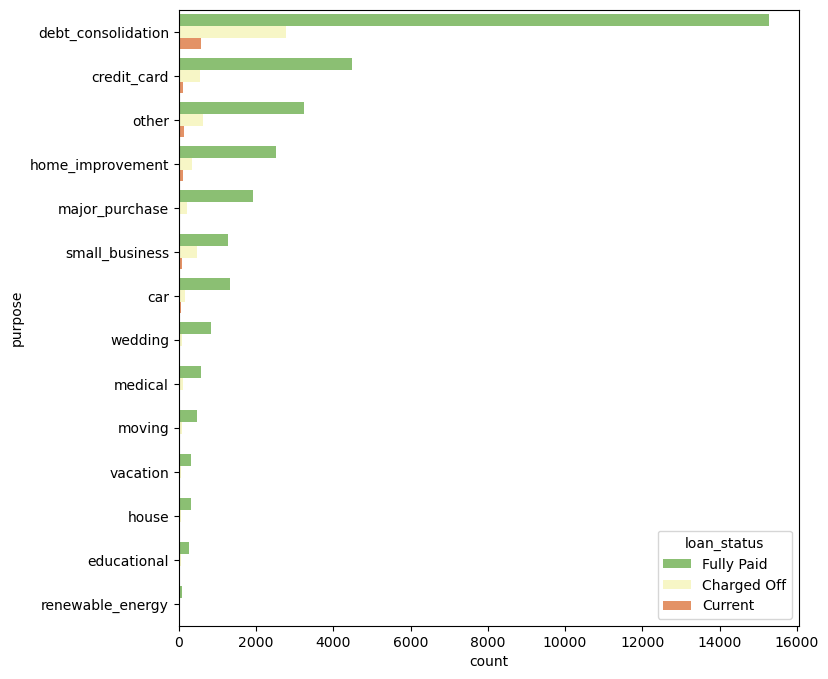

purpose,Charged off %,Record count
small_business,0.259847,1828
renewable_energy,0.184466,103
educational,0.172308,325
other,0.158527,3993
moving,0.157804,583
house,0.154856,381
medical,0.152958,693
debt_consolidation,0.148436,18641
vacation,0.139108,381
home_improvement,0.116599,2976


In [71]:
Univariate_Categorical(column='purpose', figsize=(8,8))

It is evidend that the loans taken for small_business, renewable_energy and educational are the riskier ones.

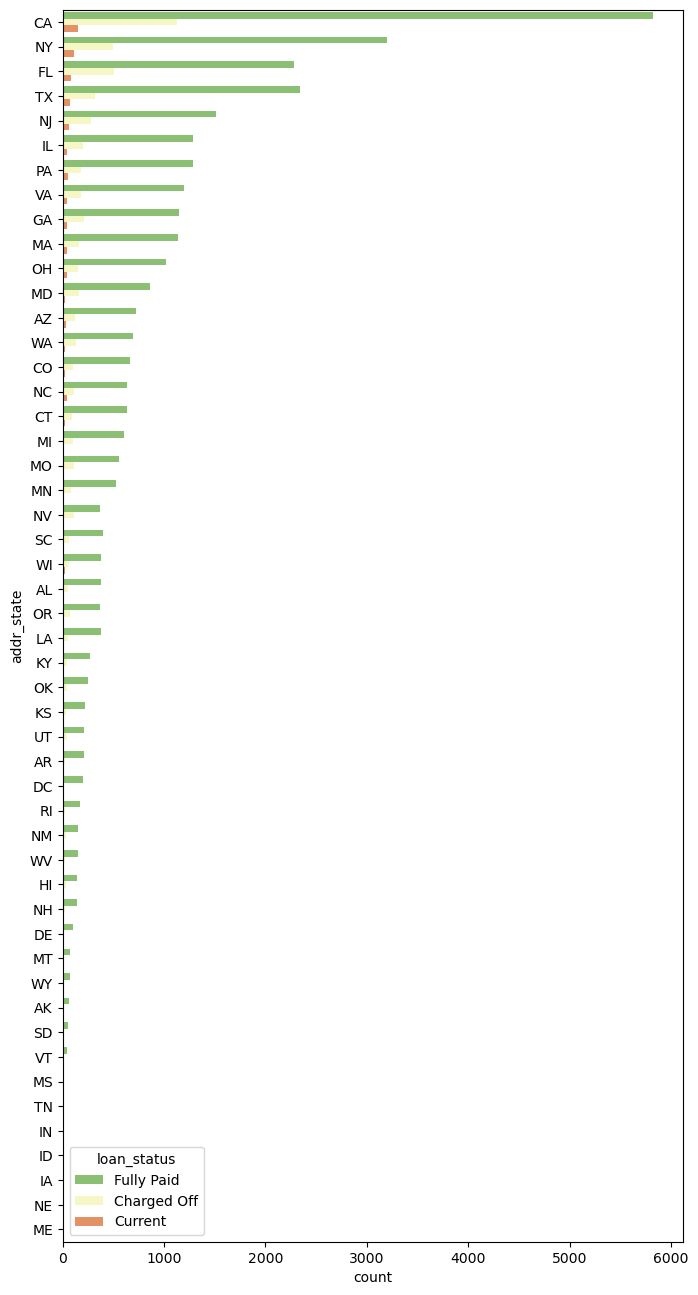

addr_state,Charged off %,Record count
NE,0.600000,5
NV,0.217304,497
SD,0.187500,64
AK,0.187500,80
FL,0.175855,2866
ID,0.166667,6
MO,0.166181,686
HI,0.160920,174
NM,0.158730,189
CA,0.158473,7099


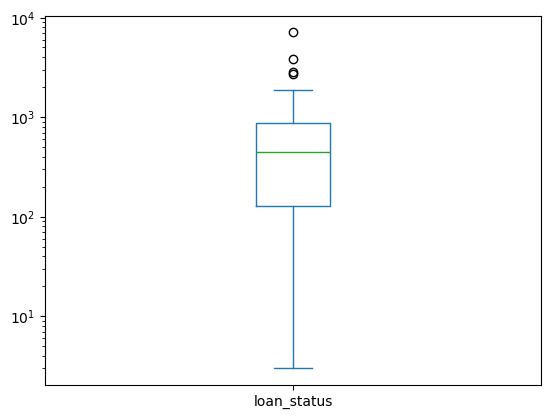

In [72]:
Univariate_Categorical(column='addr_state',figsize=(8,16), box_plot=True)

There are  some of the risky states are NE, NV, SD, AK, FL, MO

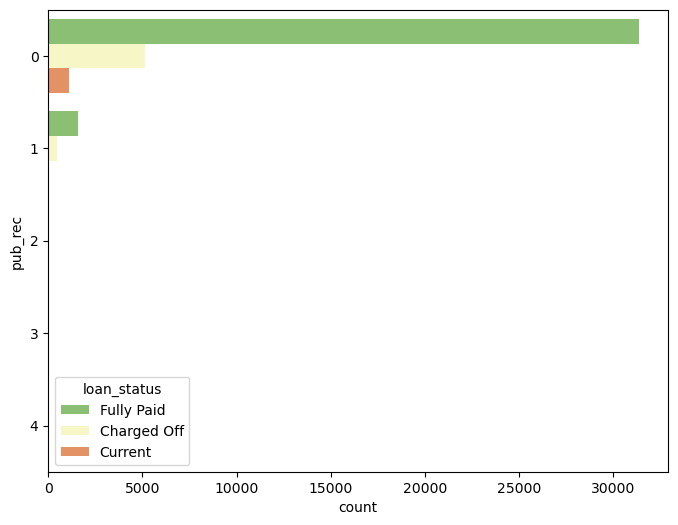

pub_rec,Charged off %,Record count
1,0.222276,2056
2,0.196078,51
0,0.137230,37601


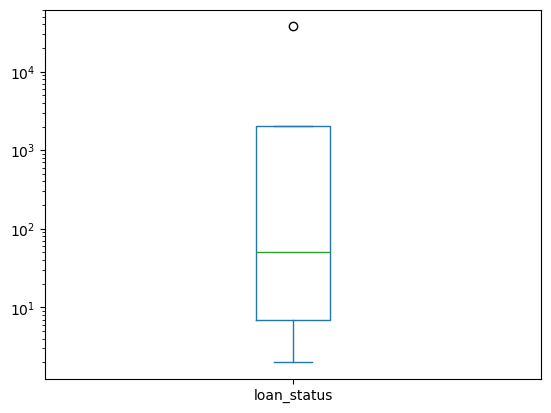

In [73]:
Univariate_Categorical(column='pub_rec', box_plot=True)

Above data and graph crealy shows that individuals with non-zero derogatory public records have higher chances of charged off

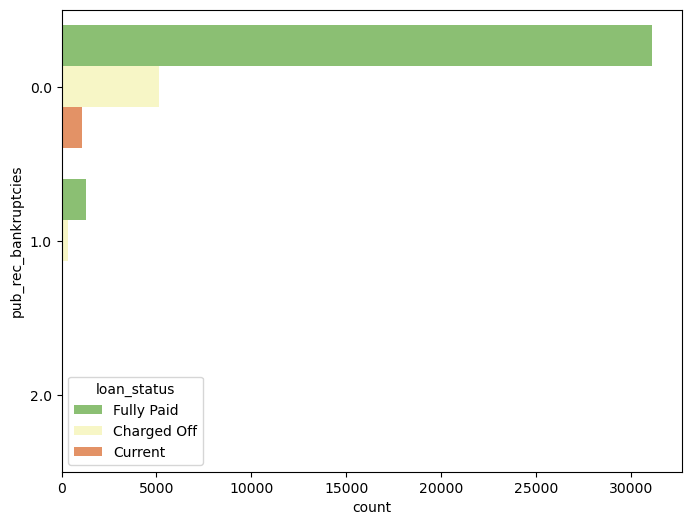

pub_rec_bankruptcies,Charged off %,Record count
2.0,0.285714,7
1.0,0.218638,1674
0.0,0.137684,37339


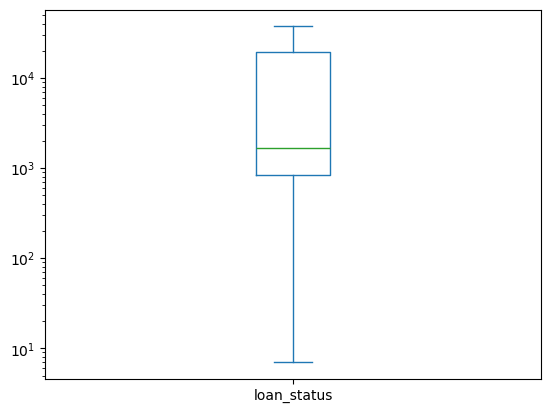

In [74]:
Univariate_Categorical(column='pub_rec_bankruptcies', box_plot=True)

Higher the number of public bankruptcy records, bigger the chance of defaulting the loan.

Higher chance of defaulted on month 12 of year 1911 on issue_d column


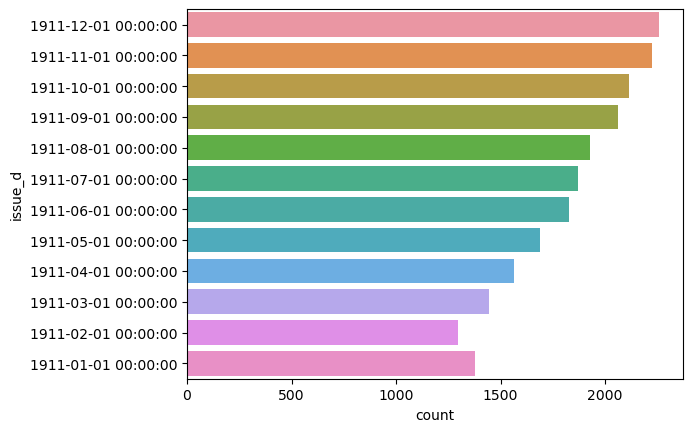

Higher chance of defaulted on month 10 of year 1900 on earliest_cr_line column


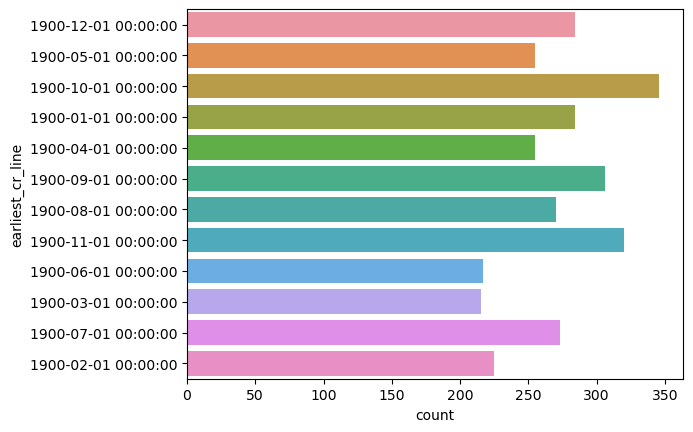

In [75]:
def get_max_year_df(column, loan_data=loan_data):
    # Get the Max year of column and plot the complete month of that year
    counts = pd.DatetimeIndex(loan_data[column]).year.value_counts()
    max_year = counts.index[0]
    # Getting datafram from that year
    max_year_df = loan_data[pd.DatetimeIndex(loan_data[column]).year == max_year]
    
    # Get the Max month of the Max year
    counts = pd.DatetimeIndex(max_year_df[column]).month.value_counts()
    max_month = counts.index[0]
    return max_year_df, max_year, max_month
    
for column in date_time_columns:
    max_year_df, max_year, max_month = get_max_year_df(column)
    print(Fore.RED + f'Higher chance of defaulted on month {max_month} of year {max_year} on {column} column')
    sns.countplot(y=pd.DatetimeIndex(max_year_df[column]), data=loan_data)
    plt.show()

## Bivariate Analysis
Now that we have analyzed each of the variables and its impact on the loan-status, let us take group of variables together and and analyze their combined effect on the loan-status. These categories are based on our business understanding. The original distribution column shows the average trend in all the data and we compare that with the data after applying our conditions

In [76]:
column_info()

-------------------------------------------------------
Column                    Dtype                Unique Count
-------------------------------------------------------
1 loan_amnt               int64                885  
2 funded_amnt             int64                1041 
3 funded_amnt_inv         float64              8205 
4 term                    object               2    
5 int_rate                float64              371  
6 installment             float64              15383
7 grade                   object               7    
8 sub_grade               int32                5    
9 emp_title               object               28821
10 emp_length              object               11   
11 home_ownership          object               4    
12 annual_inc              float64              5318 
13 verification_status     object               3    
14 issue_d                 datetime64[ns]       55   
15 loan_status             object               3    
16 purpose                 

We have 28 columns, out of it we are selecting below for bivarient analysis. Which has more driving factor for the defaulting loan applicants

Seperating it for Bivariant Analysing
categorical_columns = ['term', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies', 'grade']
numerical_columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'open_acc', 'total_acc', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'int_rate_p', 'revol_util_p']

In [77]:
def Bivariate_Analysis (*, data=loan_data, x, y, title=None, figsize=(8,6)):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, one numerical and one categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, does a violin plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(data=loan_data, y=y, x=x, hue='loan_status',palette="pastel")
    
    
    if title is not None:
        plt.title(title)
    plt.show()

In [78]:
def Bivariate_Categorical (*, data=loan_data, x, y, title=None, figsize=(8,6)):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, both categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, does a heatmap plot
    """
    fig, ax = plt.subplots(figsize=figsize)
    pt = pd.pivot_table(data=data, values='loan_status_code', index=y, columns=x)
    sns.heatmap(pt, ax=ax, cmap='YlGnBu')
    
    if title is not None:
        plt.title(title)
    plt.show()

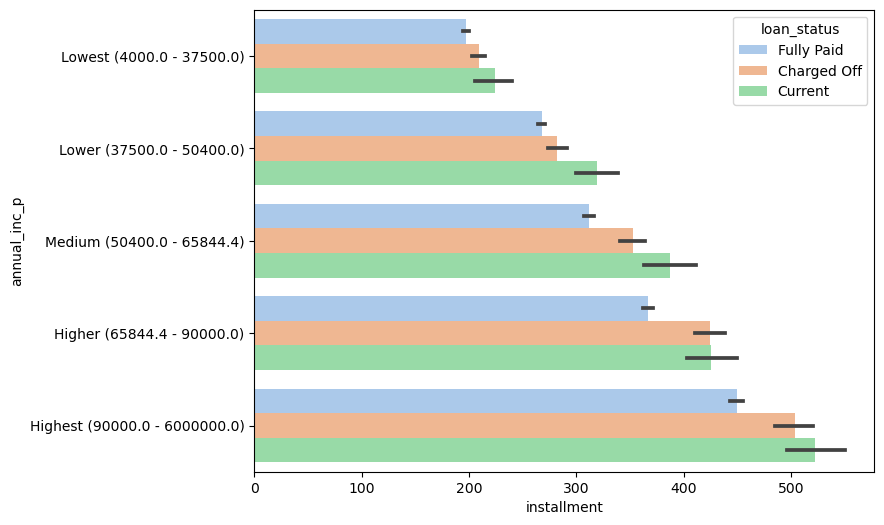

In [264]:
Bivariate_Analysis(x='installment', y='annual_inc_p')
plt.show()

Higher installments for any income group have more number of defaults.

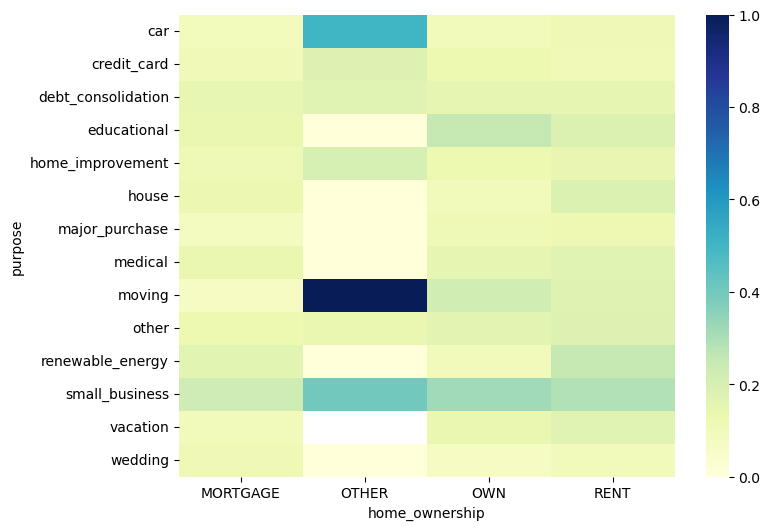

In [80]:
Bivariate_Categorical(x='home_ownership', y='purpose')

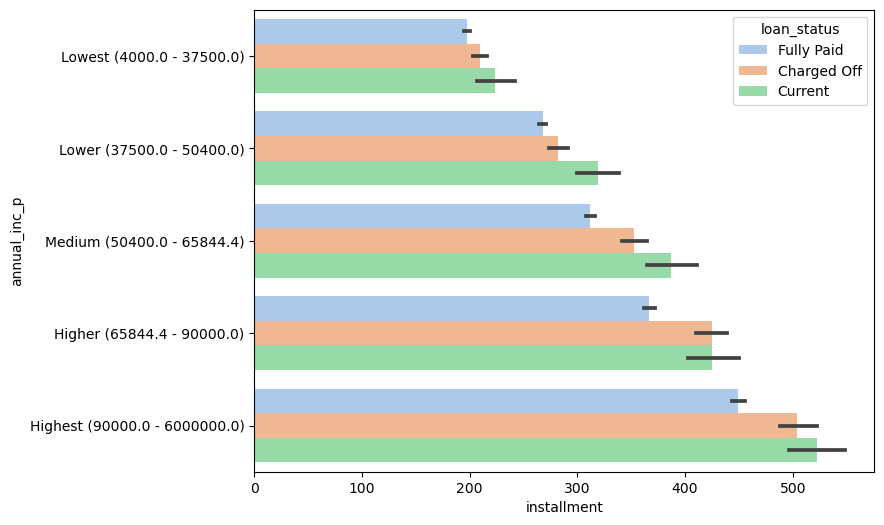

In [81]:
Bivariate_Analysis(x='installment', y='annual_inc_p')
plt.show()

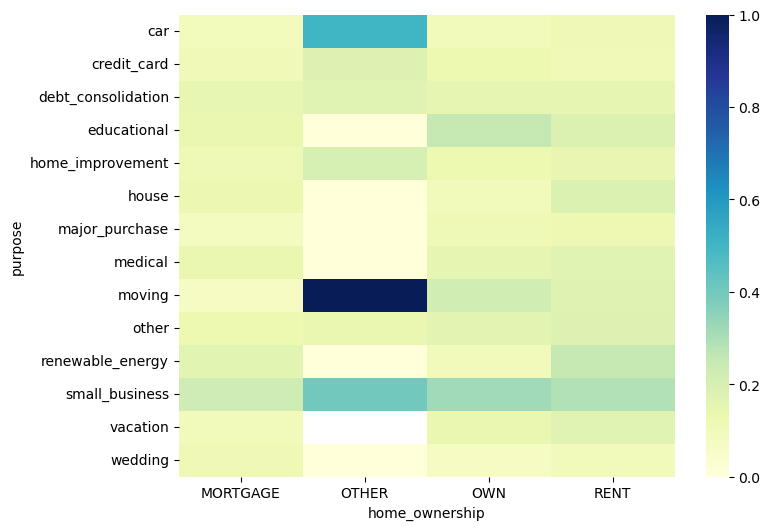

In [82]:
Bivariate_Categorical(x='home_ownership', y='purpose')

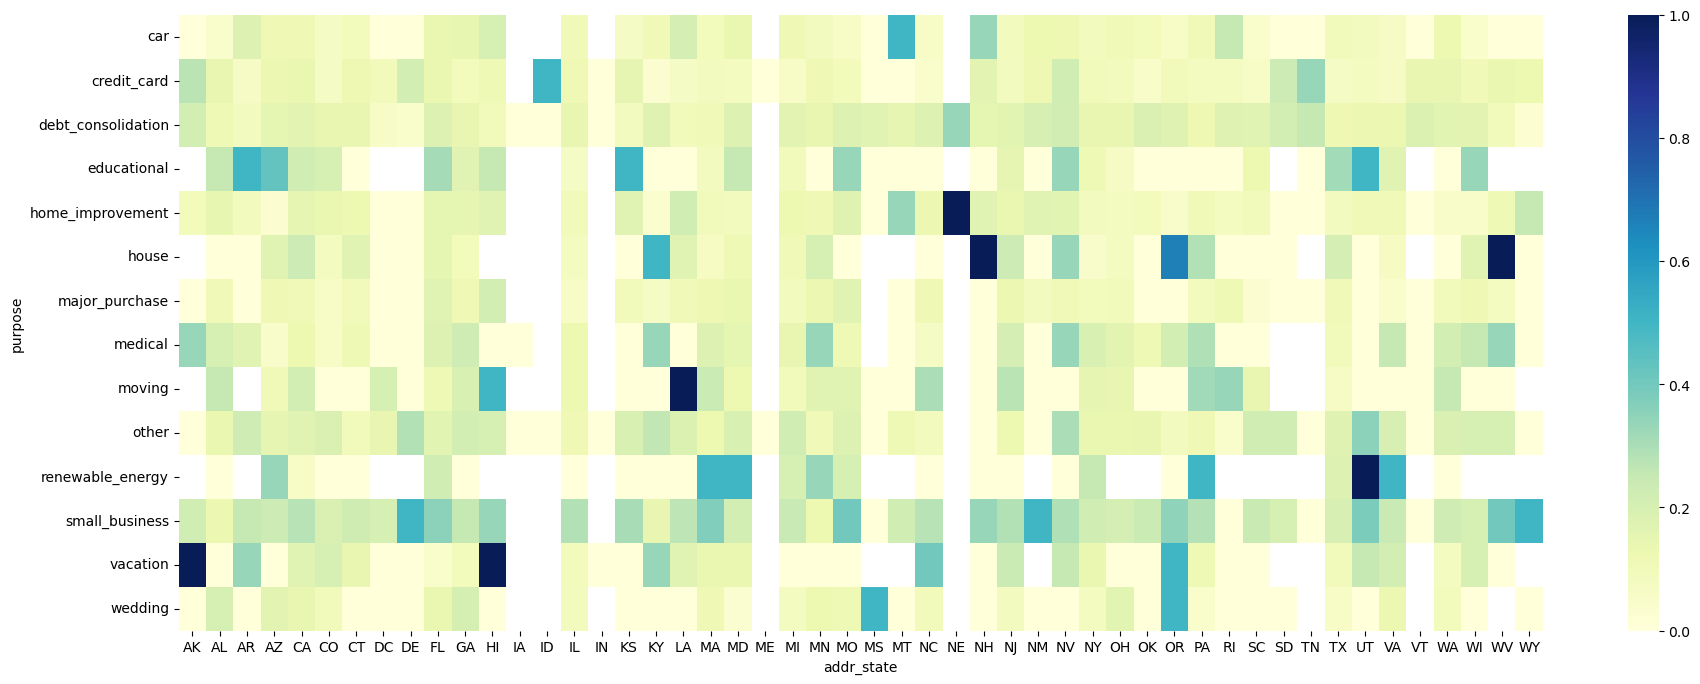

In [83]:
Bivariate_Categorical(x='addr_state', y='purpose', figsize=(22,8))

As per the above plot, the darker the intersection of addr_state has with the purpose of the loan, the risker the loan application is. 
Some of the examples are below:
 * vacation loans in AK, HI, OR
 * education loans in AR, KS, UT
 * small business loans in DE, NM, WV, WY
 * wedding loans in MS, OR



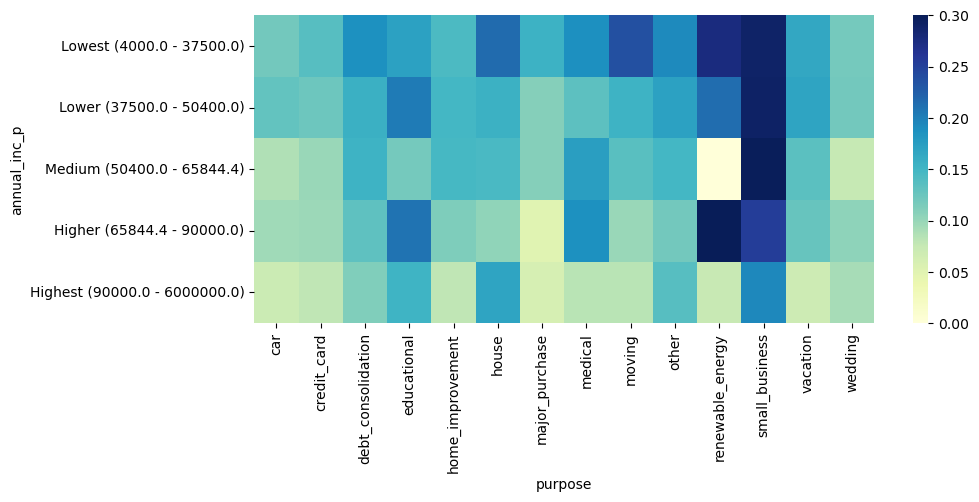

In [84]:
Bivariate_Categorical(x='purpose', y='annual_inc_p', figsize=(10,4))

Plot of various income groups versus the risky purposes of loans for them. Some examples are:
•small business loans for lowest and medium income groups
•renewable energy loans for higher income group

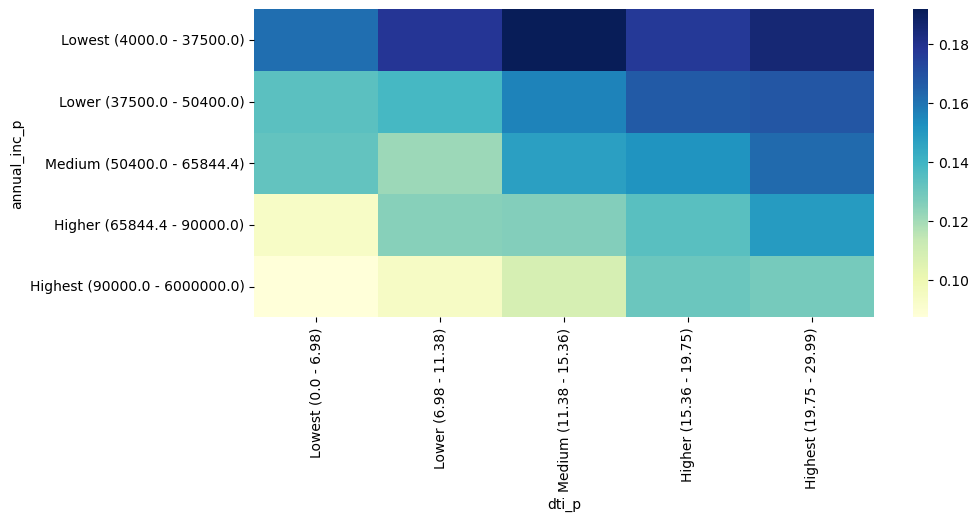

In [278]:
Bivariate_Categorical(x='dti_p', y='annual_inc_p', figsize=(10,4))

Medium debt-to-income group in the lowest income range is the most risky when it comes to loan repayment.

 Hereby we come to an end of the EDA of the loan data set and finding some of the drivers for loan default. Apart from the ones highlighted below, I am sure there will be multiple others too; however, according to me, these are the most impactful ones.

<b>Minor Impact</b> <br>
.Higher loan amount (above 16K) <br>
•Higher installment amount (above 327) <br>
•Lower annual income (below 37K)<br> 
•Higher debt to income ratio (above 15%) <br>
•Applicant’s address state (NV, SD, AK, FL, etc.) <br>
•Loan issue month (Dec, May, Sep)<br>

<b>Heavy impact</b> <br>
•Higher interest rate (above 13%) <br>
•Higher revolving line utilization rate (above 58%) <br>
•Repayment term (5 years)<br> 
•Loan grade & sub-grade (D to G) <br>
•Missing employment record<br> 
•Loan purpose (small business, renewable energy, educational) <br>
•Derogatory public records (1 or 2) <br>
•Public bankruptcy records (1 or 2)<br>

<b>Combined impact</b> <br>
•High loan amount & interest rate for lower income group <br>
•High installment and longer repayment term <br>
•Home ownership (other) and loan purpose (car, moving or small business) <br>
•Residential state and loan purpose<br> 
•Income group and loan purpose<br>

In [114]:
# Creating a correlation matrix for defaulted applicant
correlation_matrix = loan_data[loan_data['loan_status'] == 'Charged Off'].corr(numeric_only=True)

In [115]:
round(correlation_matrix, 2)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,sub_grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,loan_status_code
loan_amnt,1.00,0.98,0.91,0.35,0.93,0.01,0.35,0.06,-0.03,0.01,0.18,-0.05,0.31,0.04,0.28,-0.03,NaN
funded_amnt,0.98,1.00,0.93,0.35,0.95,0.00,0.35,0.06,-0.03,0.01,0.18,-0.05,0.30,0.05,0.28,-0.03,NaN
funded_amnt_inv,0.91,0.93,1.00,0.37,0.86,0.01,0.31,0.07,-0.03,-0.02,0.15,-0.05,0.25,0.07,0.25,-0.04,NaN
int_rate,0.35,0.35,0.37,1.00,0.33,-0.04,0.13,0.04,0.12,0.06,0.04,0.08,0.08,0.38,-0.01,0.07,NaN
installment,0.93,0.95,0.86,0.33,1.00,-0.00,0.36,0.04,-0.01,0.02,0.18,-0.04,0.30,0.07,0.25,-0.03,NaN
sub_grade,0.01,0.00,0.01,-0.04,-0.00,1.00,-0.01,0.03,-0.03,0.02,0.02,0.00,0.01,-0.00,0.03,-0.01,NaN
annual_inc,0.35,0.35,0.31,0.13,0.36,-0.01,1.00,-0.09,0.02,0.04,0.21,-0.01,0.38,0.07,0.29,-0.00,NaN
dti,0.06,0.06,0.07,0.04,0.04,0.03,-0.09,1.00,-0.07,-0.03,0.30,0.01,0.24,0.23,0.27,0.02,NaN
delinq_2yrs,-0.03,-0.03,-0.03,0.12,-0.01,-0.03,0.02,-0.07,1.00,-0.01,-0.02,-0.00,-0.08,-0.10,0.06,0.00,NaN
inq_last_6mths,0.01,0.01,-0.02,0.06,0.02,0.02,0.04,-0.03,-0.01,1.00,0.08,0.01,-0.01,-0.14,0.10,0.01,NaN


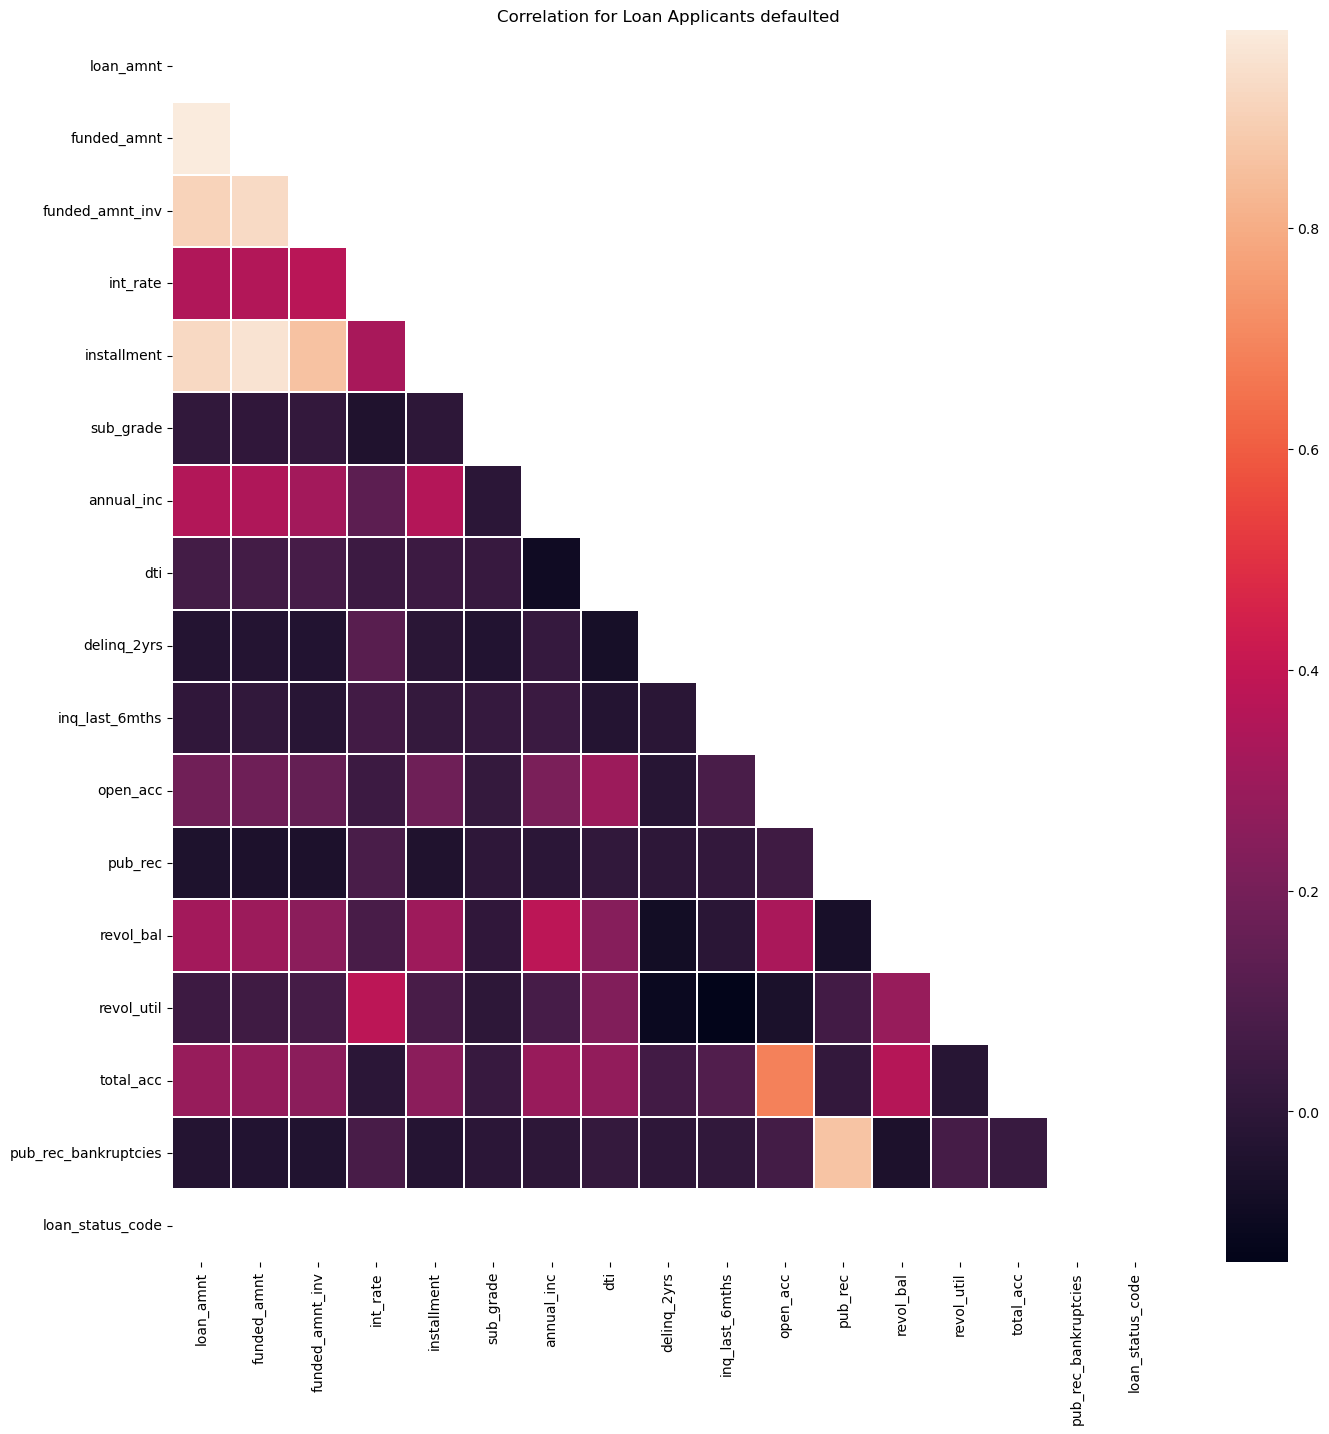

In [116]:
# co-relation Upper Triangle matrix
correlation_uppper_matrix = np.triu(correlation_matrix)

fig, ax = plt.subplots(figsize=(16,16))
# Masking the upper triangle matrix and rounding off with value 2.
heat_m = sns.heatmap(correlation_matrix, mask=correlation_uppper_matrix,fmt='.2f', linewidths=.2, annot=True, ax=ax)
heat_m.set_title("Correlation for Loan Applicants defaulted")

plt.show();